# **Previsão básica de ações utilizando Multi Layer Perceptron**

- Diogo Nunes Batista
- Rafael de Oliveira Évora
- Vinicius Gabriel 

### Carregamento dos dados

In [72]:
import pandas 
import numpy as np

STOCK_NAME = 'EMBR3'

N_DAYS = 7

df = pandas.read_csv(f'data/final/{STOCK_NAME}.csv', index_col='DATA', sep=';', decimal='.')
df

,ABERTURA,FECHAMENTO,VARIAÇÃO,MÍNIMO,MÁXIMO,VOLUME,SELIC
DATA,,,,,,,
17/11/2022,0.1402,0.1389,0.09659,0.1332,0.1422,0.23056,0.050788
18/11/2022,0.1392,0.1420,0.10223,0.1386,0.1463,0.14260,0.050788
21/11/2022,0.1434,0.1436,0.10113,0.1408,0.1450,0.08383,0.050788
22/11/2022,0.1440,0.1429,0.09951,0.1404,0.1450,0.07935,0.050788
23/11/2022,0.1420,0.1418,0.09923,0.1409,0.1443,0.09272,0.050788
...,...,...,...,...,...,...,...
08/11/2024,0.5005,0.5379,0.10747,0.4940,0.5528,0.99999,0.041957
11/11/2024,0.5434,0.5565,0.10346,0.5392,0.5601,0.49551,0.041957
12/11/2024,0.5434,0.5413,0.09727,0.5326,0.5600,0.91050,0.041957


### Separação input e target

In [73]:
# input = [(df[i:i+7].values, np.array([df.iat[i+7, 0]])) for i in range(0, df.index.size - 7)]
input = np.array([df.iloc[i:i+7].to_numpy().flatten() for i in range(0, df.index.size - 2 * N_DAYS)])
target = np.array([df.iloc[i:i+7]['ABERTURA'].to_numpy().flatten() for i in range(7, df.index.size - N_DAYS)])

N_TEST = 7

x_train = input[:-N_TEST]
t_train = target[:-N_TEST]

x_test = input[-N_TEST]
t_test = target[-N_TEST]

x_train.shape, t_train.shape, x_test.shape, t_test.shape

((480, 49), (480, 7), (49,), (7,))

### Treinamento

Error: 2.351960768738947 - epochs: 1000


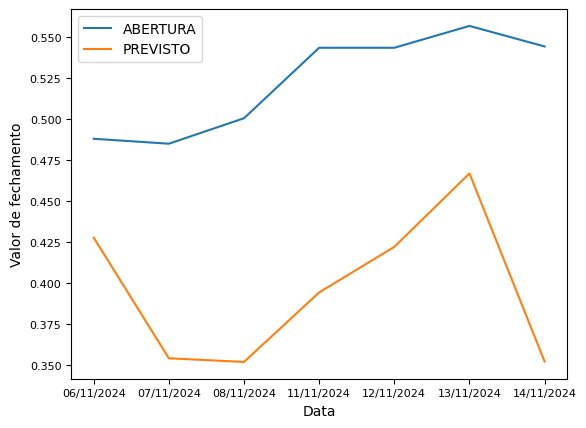

In [ ]:
from mlp_model import MLP

mlp = MLP(layers_sizes=[x_train.shape[1], 150, 125, 75, 50, 25, 5, t_train.shape[1]])
error, epochs = mlp.train(x_train, t_train, learning_rate=0.01, max_epochs=5000, tolerated_error=0.0001)
print(f'Error: {error} - epochs: {epochs}')

y_test = mlp.predict(x_test)
df_test = df.iloc[-N_TEST:].copy()
df_test['PREVISTO'] = y_test

df_test.plot(y=['ABERTURA', 'PREVISTO'], xlabel='Data', ylabel='Valor de Abertura', fontsize=8).get_figure().savefig(f'results/{STOCK_NAME}_1.png')

# y = mlp.predict(x_train)

# df_predict = df.iloc[N_DAYS:-N_TEST].copy()
# df_predict['PREVISTO'] = y

# df_predict.plot(y=['ABERTURA', 'PREVISTO'], xlabel='Data', ylabel='Valor de fechamento', fontsize=8).get_figure().savefig(f'results/{STOCK_NAME}_2.png')